In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
X, y = load_boston(return_X_y=True) 
Data_Iterations = X.shape[0]   
Data_Features = X.shape[1]      
Data_Target = y.shape[0]
Xdf=pd.DataFrame({'x1': X[:,0], 'x2': X[:,1], 'x3': X[:,2], 'x4': X[:,3],
                  'x5': X[:,4], 'x6': X[:,5], 'x7': X[:,6], 'x8': X[:,7],
                  'x9': X[:,8], 'x10': X[:,9], 'x11': X[:,10], 'x12': X[:,11], 'x13': X[:,12]})

Xdf[0]

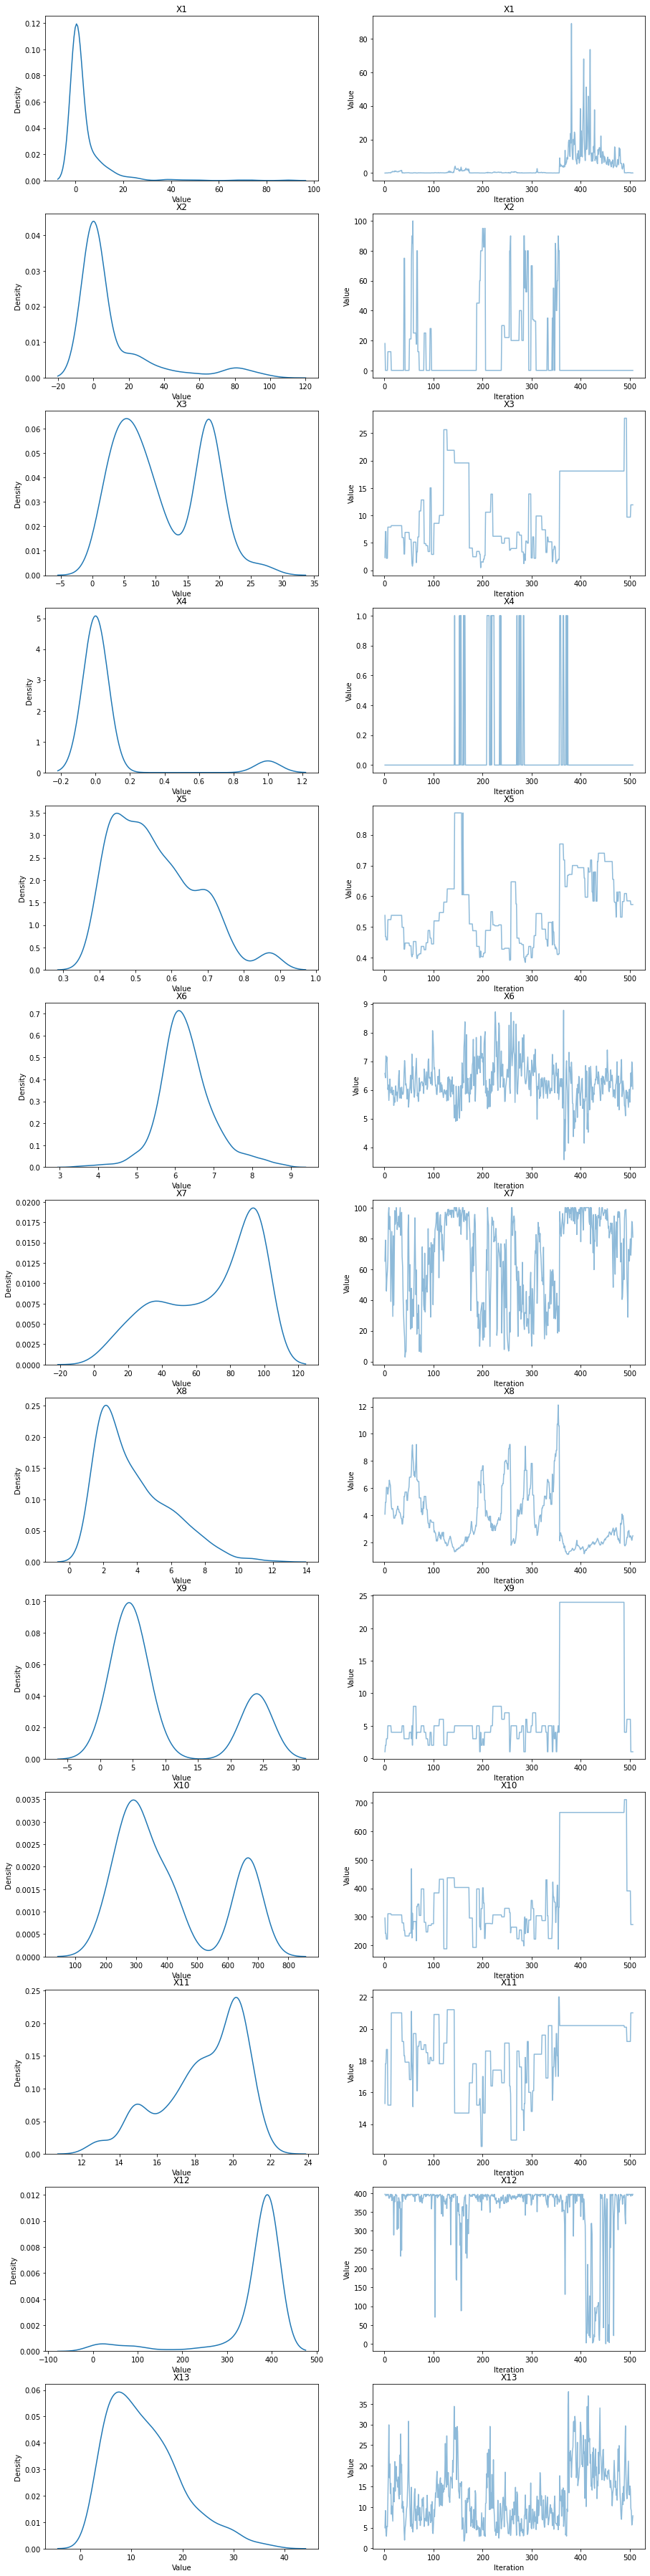

In [70]:
def pl_dense_normal(Xdf):
    Data_Features=Xdf.shape[1]
    Data_Iterations = Xdf.shape[0]
    plt.figure(figsize=(15,5*Data_Features))
    for i in range(Data_Features+1):
        if i!=0:
            if i==1:
                k=0    
            k=k+1
            plt.subplot(Data_Features,2,k)
            plt.title(f'X{i}'), plt.xlabel('Value'), plt.ylabel('Density')
            sns.kdeplot(data=Xdf[f'x{i}'],alpha=0.5)
            k=k+1
            plt.subplot(Data_Features,2,k)
            plt.title(f'X{i}'), plt.xlabel('Iteration'), plt.ylabel('Value')
            plt.plot(np.linspace(1,Data_Iterations,Data_Iterations),Xdf[f'x{i}'],alpha=0.5)

pl_dense_normal(Xdf)

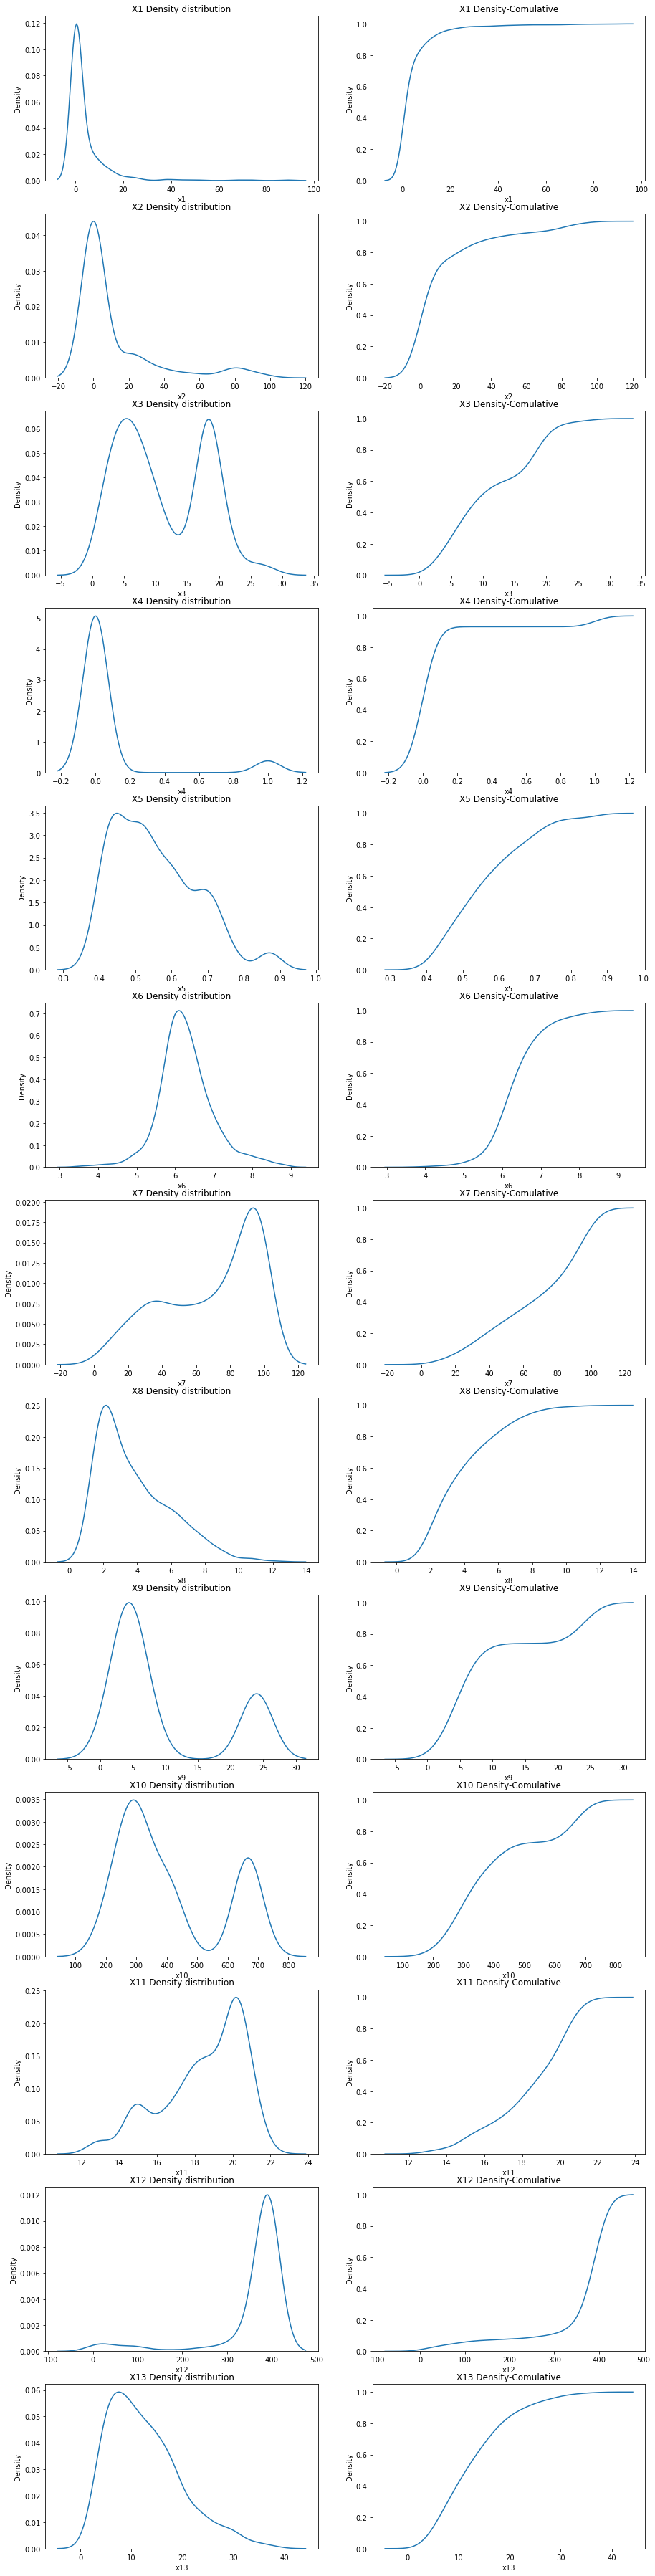

In [71]:
#Funçao que imprime as distribuiçoes, normal e comulativa
def pl_tot_dense(Xdf):
    Data_Features=Xdf.shape[1]
    Data_Iterations = Xdf.shape[0]
    plt.figure(figsize=(15,5*Data_Features))
    for i in range(Data_Features+1):
        if i!=0:
            if i==1:
                    k=0    
            k=k+1
            plt.subplot(Xdf.shape[1],2,k)
            plt.title(f'X{i} Density distribution')
            sns.kdeplot(data=Xdf[f'x{i}'],alpha=0.5)
            k=k+1
            plt.subplot(Xdf.shape[1],2,k)
            plt.title(f'X{i} Density-Comulative')
            sns.kdeplot(data=Xdf[f'x{i}'],cumulative=True, common_norm=False, common_grid=True)

pl_tot_dense(Xdf)
        

In [72]:
#Funçao que imprime todas as distribuiçoes normais de dois dataframes, todas as features no mesmo grafico

def pt_dense(Xdf,Xdf2,title1,title2):
    if Xdf.shape[1]!=Xdf2.shape[1]: 
        print('ERROR: Number of Features in Dataframes not equal')
        return
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.title(title1), plt.xlabel('Data Range'), plt.ylabel('Density')
    sns.kdeplot(data=Xdf,cumulative=False, common_norm=False, common_grid=True, alpha=0.5)
    plt.subplot(1,2,2)
    plt.title(title2), plt.xlabel('Data Range'), plt.ylabel('Density')
    sns.kdeplot(data=Xdf2,cumulative=False, common_norm=False, common_grid=True, alpha=0.5)




In [73]:
#Funçao que imprime as distribuiçoes normais de dois dataframes
def pl_tot_dense_2(Xdf1,Xdf2,title1,title2):
    if Xdf1.shape[1]!=Xdf2.shape[1]: 
        print('ERROR: Number of Features in Dataframes not equal')
        return

    plt.figure(figsize=(15,5*Xdf.shape[1]))
    for i in range(Data_Features+1):
        if i!=0:
            if i==1:
                    k=0    
            k=k+1
            plt.subplot(Xdf1.shape[1],2,k)
            plt.title(f'X{i} {title1}'),
            sns.kdeplot(data=Xdf1[f'x{i}'],cumulative=False, common_norm=False, common_grid=True,alpha=0.5)
            k=k+1
            plt.subplot(Xdf1.shape[1],2,k)
            plt.title(f'X{i} {title2}')
            sns.kdeplot(data=Xdf2[f'x{i}'],cumulative=False, common_norm=False, common_grid=True,alpha=0.5)



# StandardScaler
(xi-mean(x))/stdev(x)



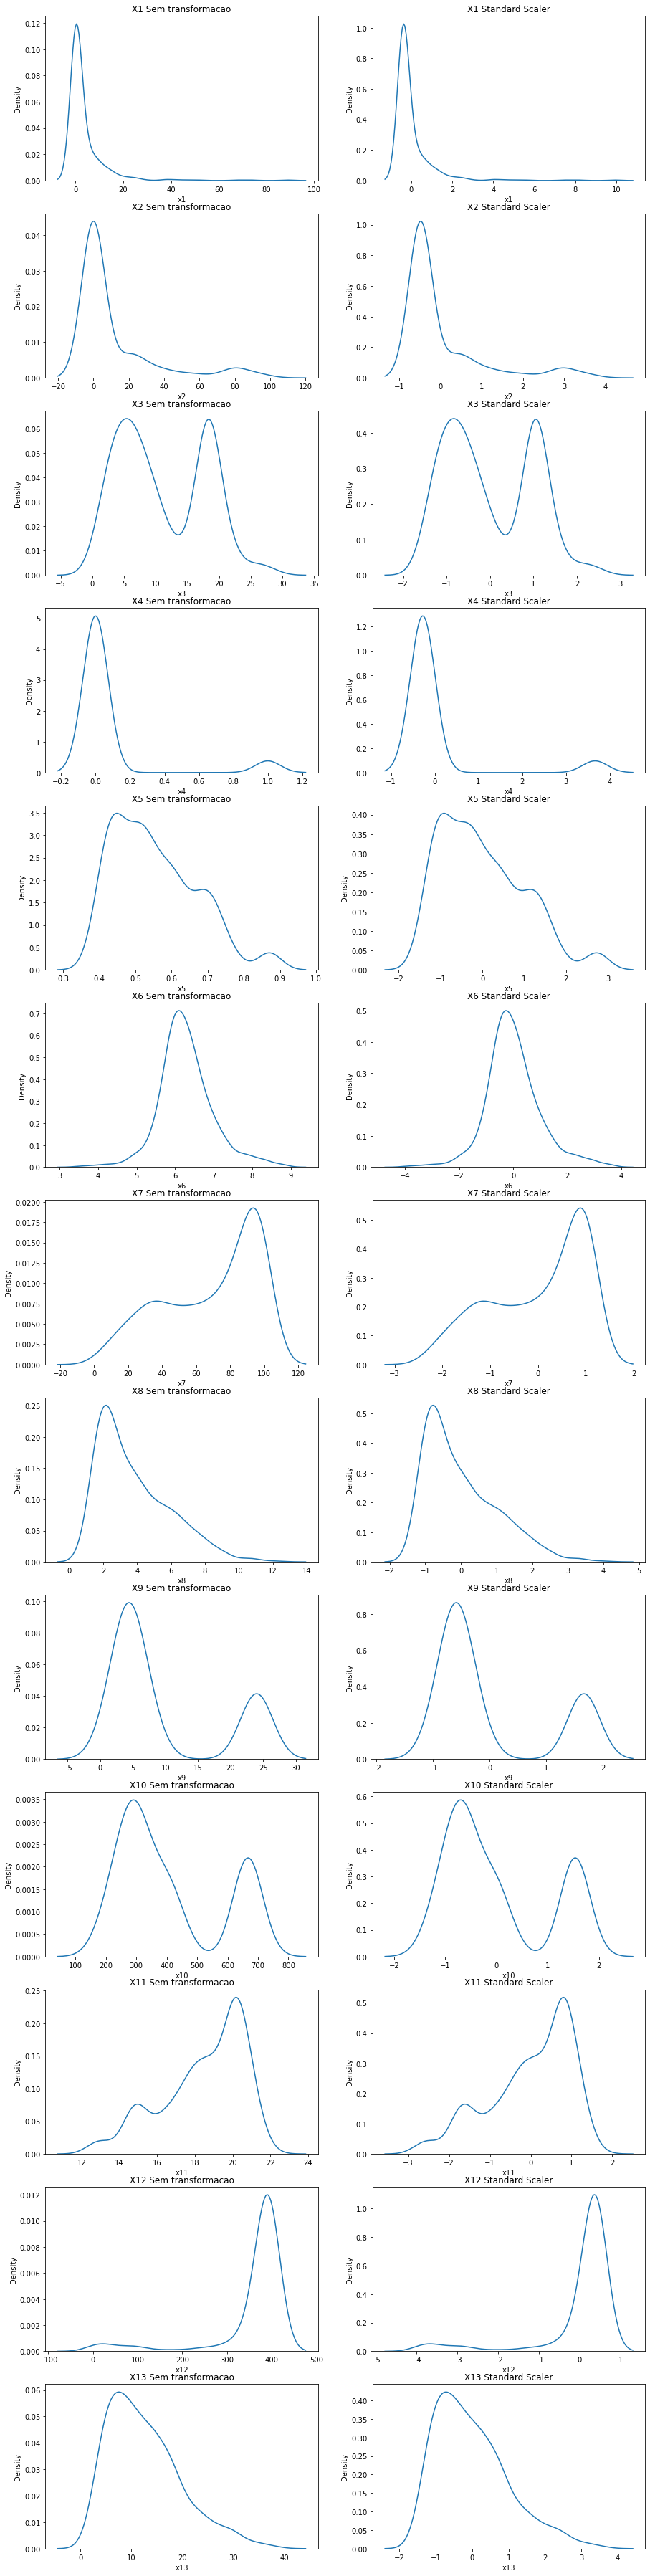

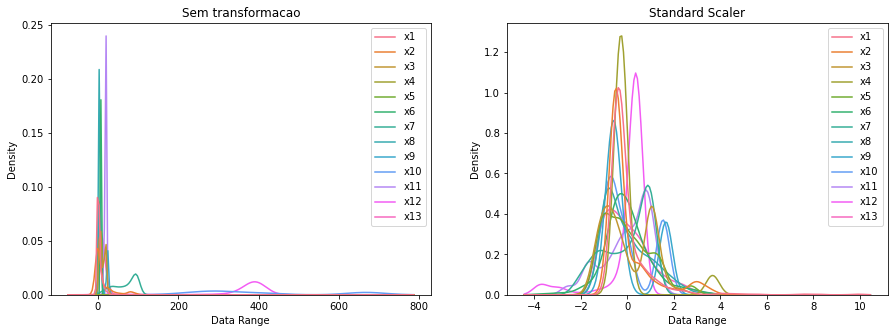

In [74]:
from sklearn.preprocessing import StandardScaler
Std = StandardScaler()
data_tf = Std.fit_transform(Xdf)
dfSS = pd.DataFrame(data_tf, columns=Xdf.columns)
pl_tot_dense_2(Xdf,dfSS,"Sem transformacao","Standard Scaler")
pt_dense(Xdf,dfSS,"Sem transformacao","Standard Scaler")

# MinMaxScaler
(xi-min(x))/(max(x)-min(x))


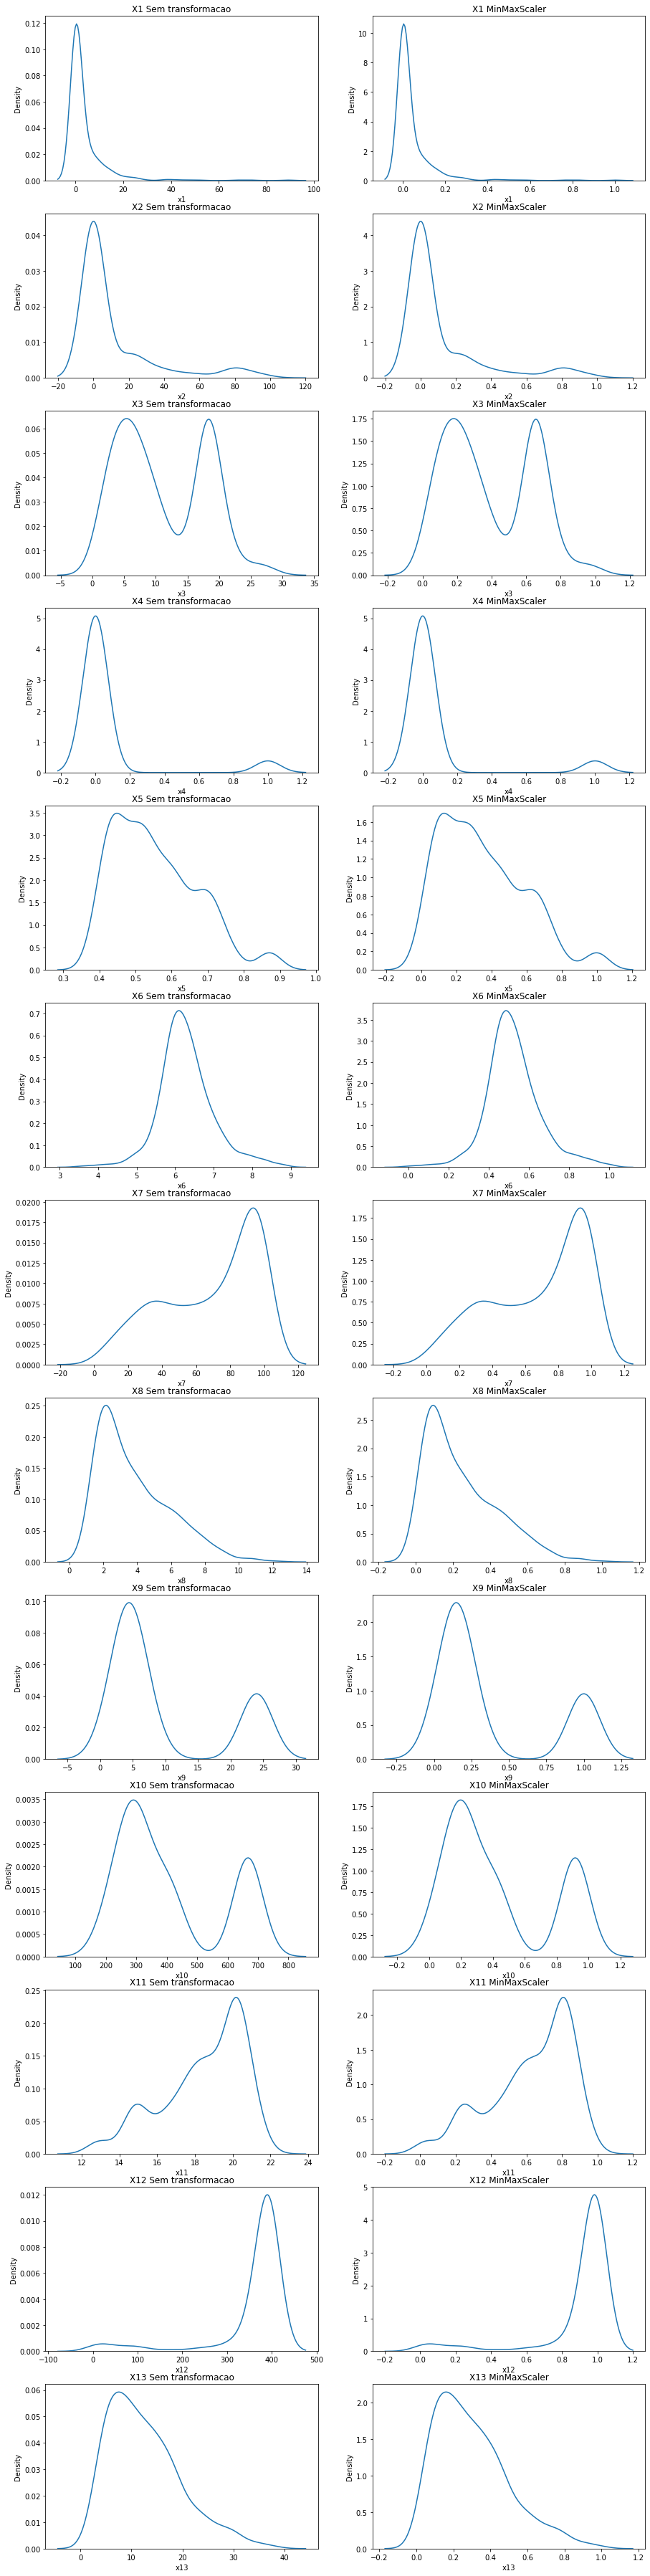

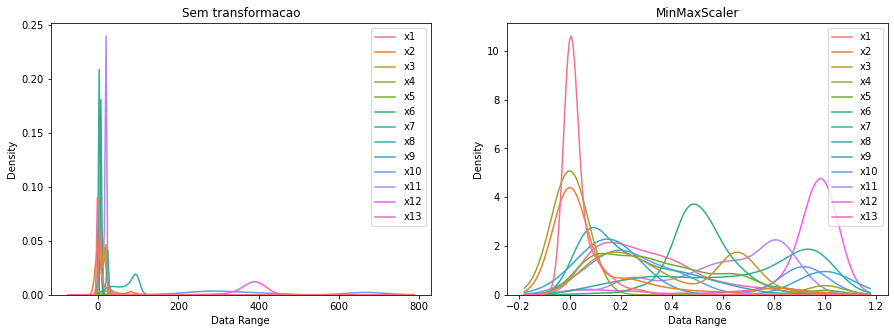

In [75]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(Xdf)
dfMMS = pd.DataFrame(data_tf, columns=Xdf.columns)
pl_tot_dense_2(Xdf,dfMMS,"Sem transformacao","MinMaxScaler")
pt_dense(Xdf,dfMMS,"Sem transformacao","MinMaxScaler")

# Robust Scaler
(xi-Q1(x))/(Q3(x)-Q1(x))



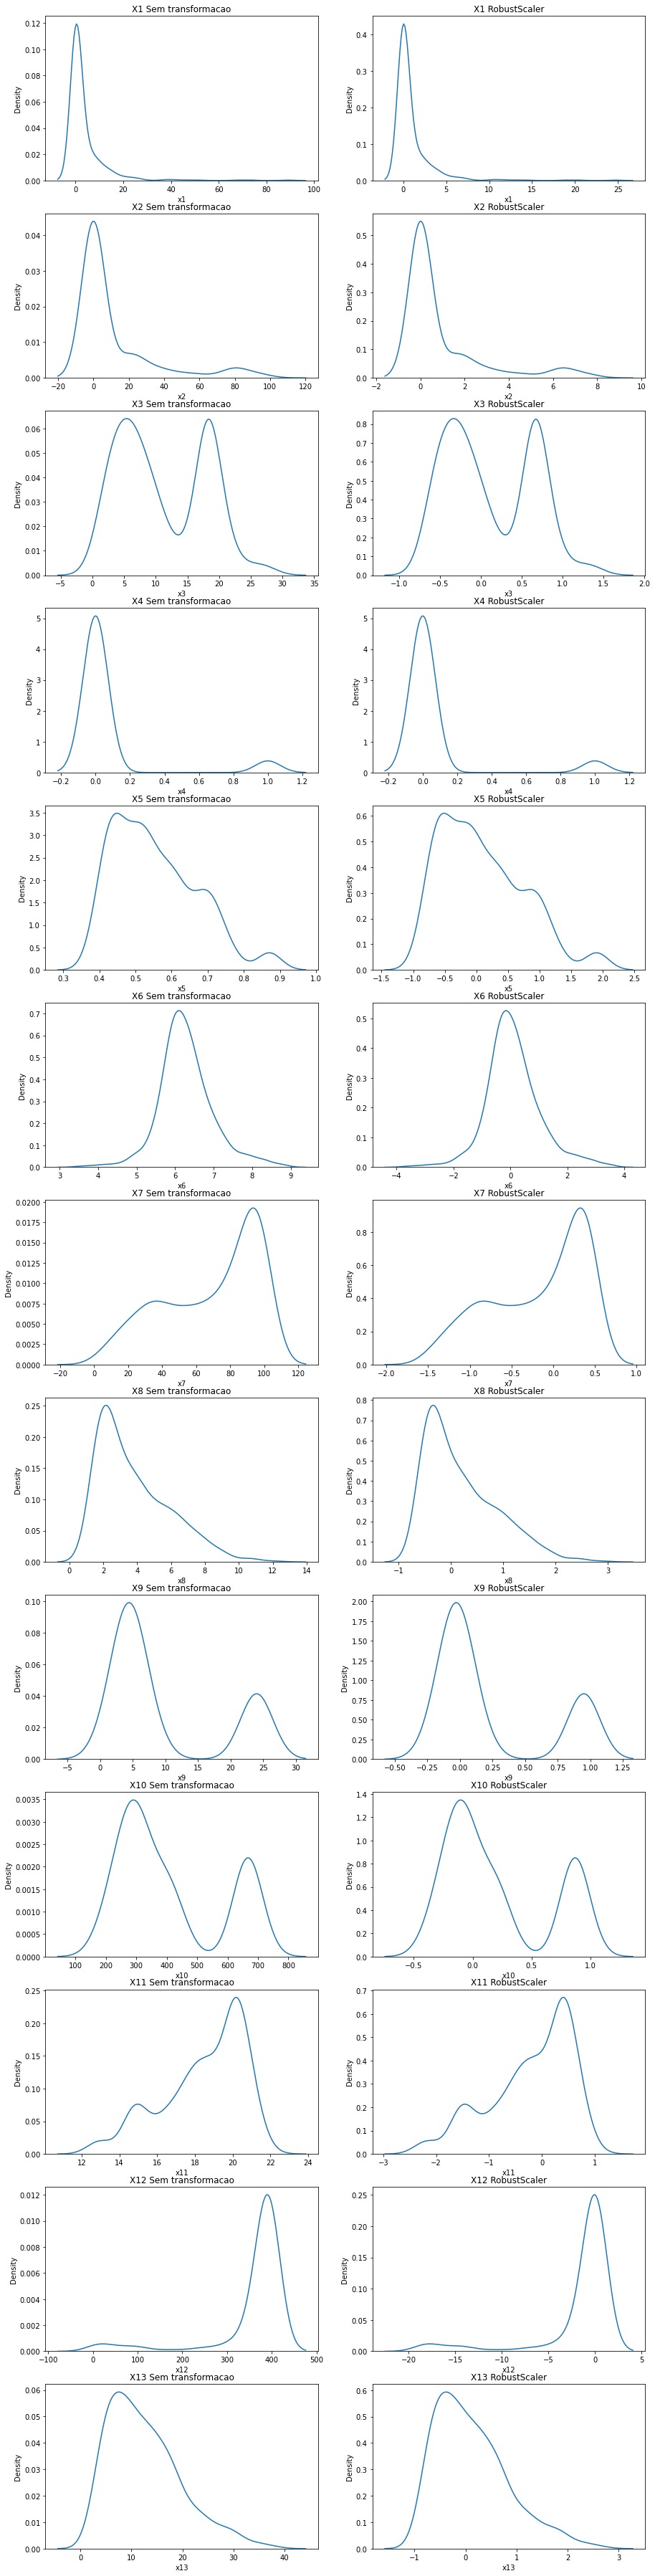

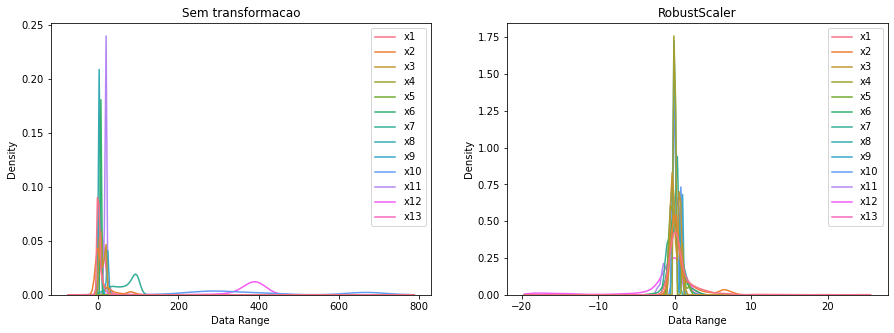

In [76]:
from sklearn.preprocessing import RobustScaler
Robust = RobustScaler()
data_tf = Robust.fit_transform(Xdf)
dfRS = pd.DataFrame(data_tf, columns=Xdf.columns)
pl_tot_dense_2(Xdf,dfRS,"Sem transformacao","RobustScaler")
pt_dense(Xdf,dfRS,"Sem transformacao","RobustScaler")

# Normalizer

xi/(sqrt(xi**+yi**+zi**)



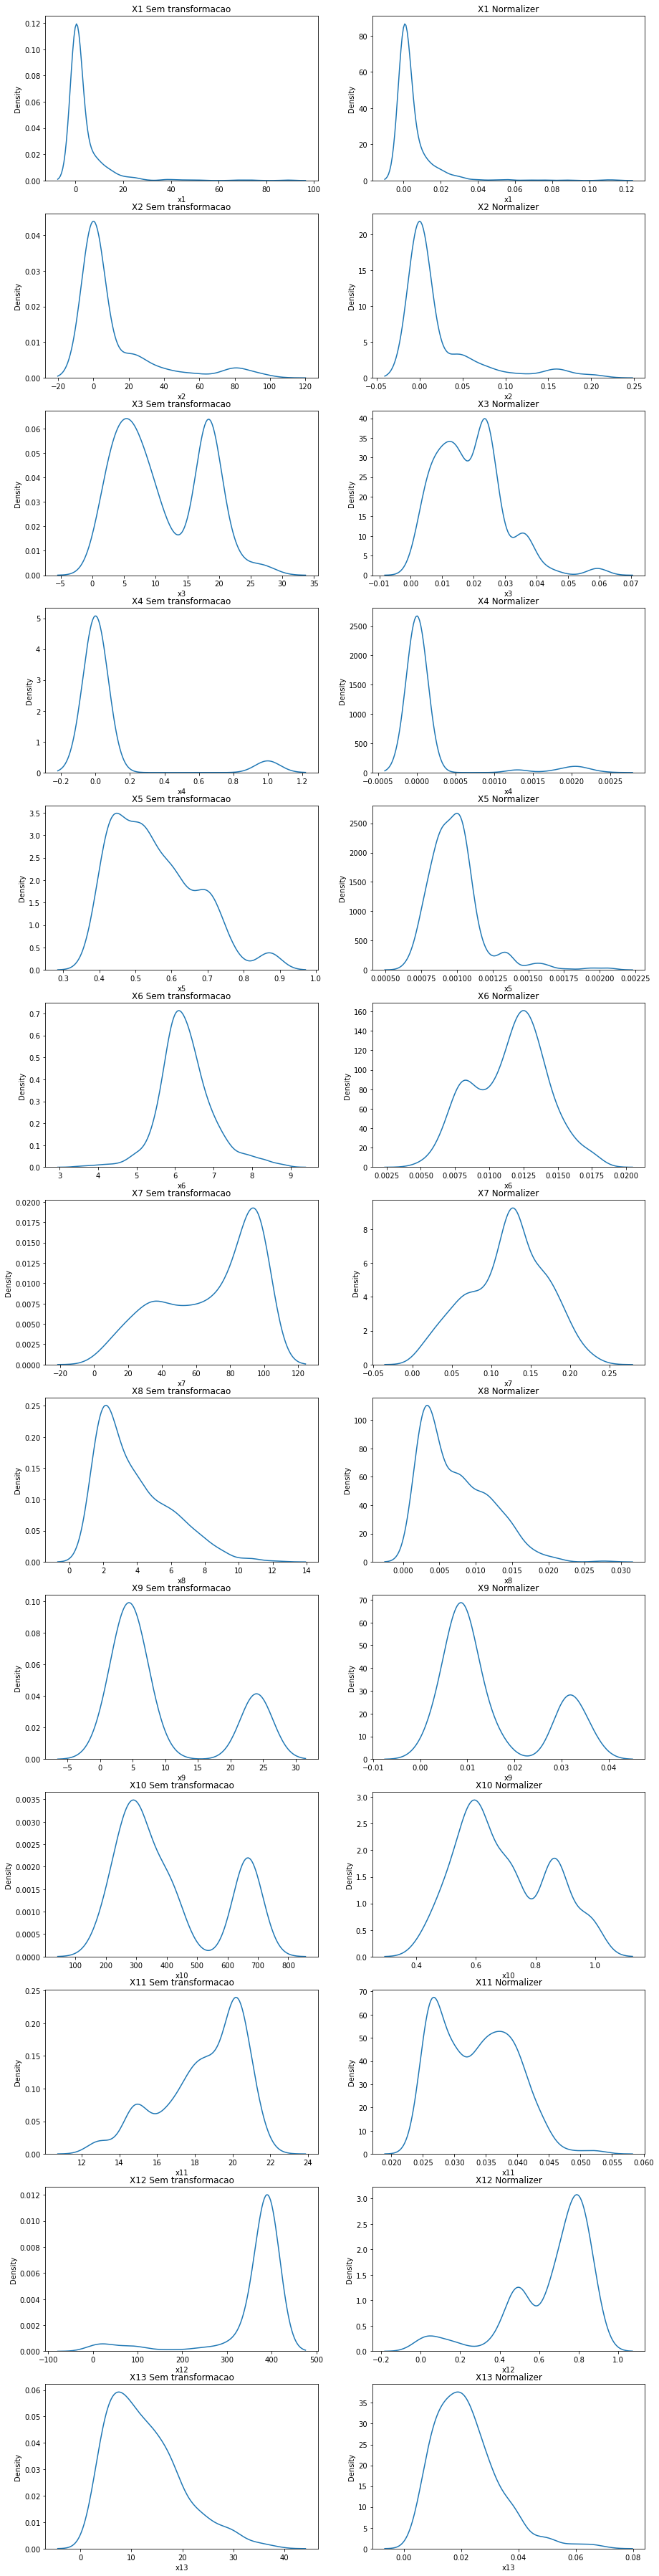

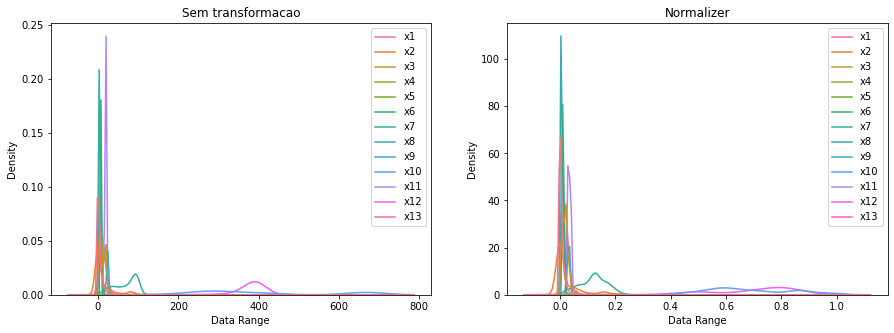

In [77]:
from sklearn.preprocessing import Normalizer
Normalizer = Normalizer()
data_tf = Normalizer.fit_transform(Xdf)
dfNorm = pd.DataFrame(data_tf, columns=Xdf.columns)
pl_tot_dense_2(Xdf,dfNorm,"Sem transformacao","Normalizer")
pt_dense(Xdf,dfNorm,"Sem transformacao","Normalizer")


# Quantile



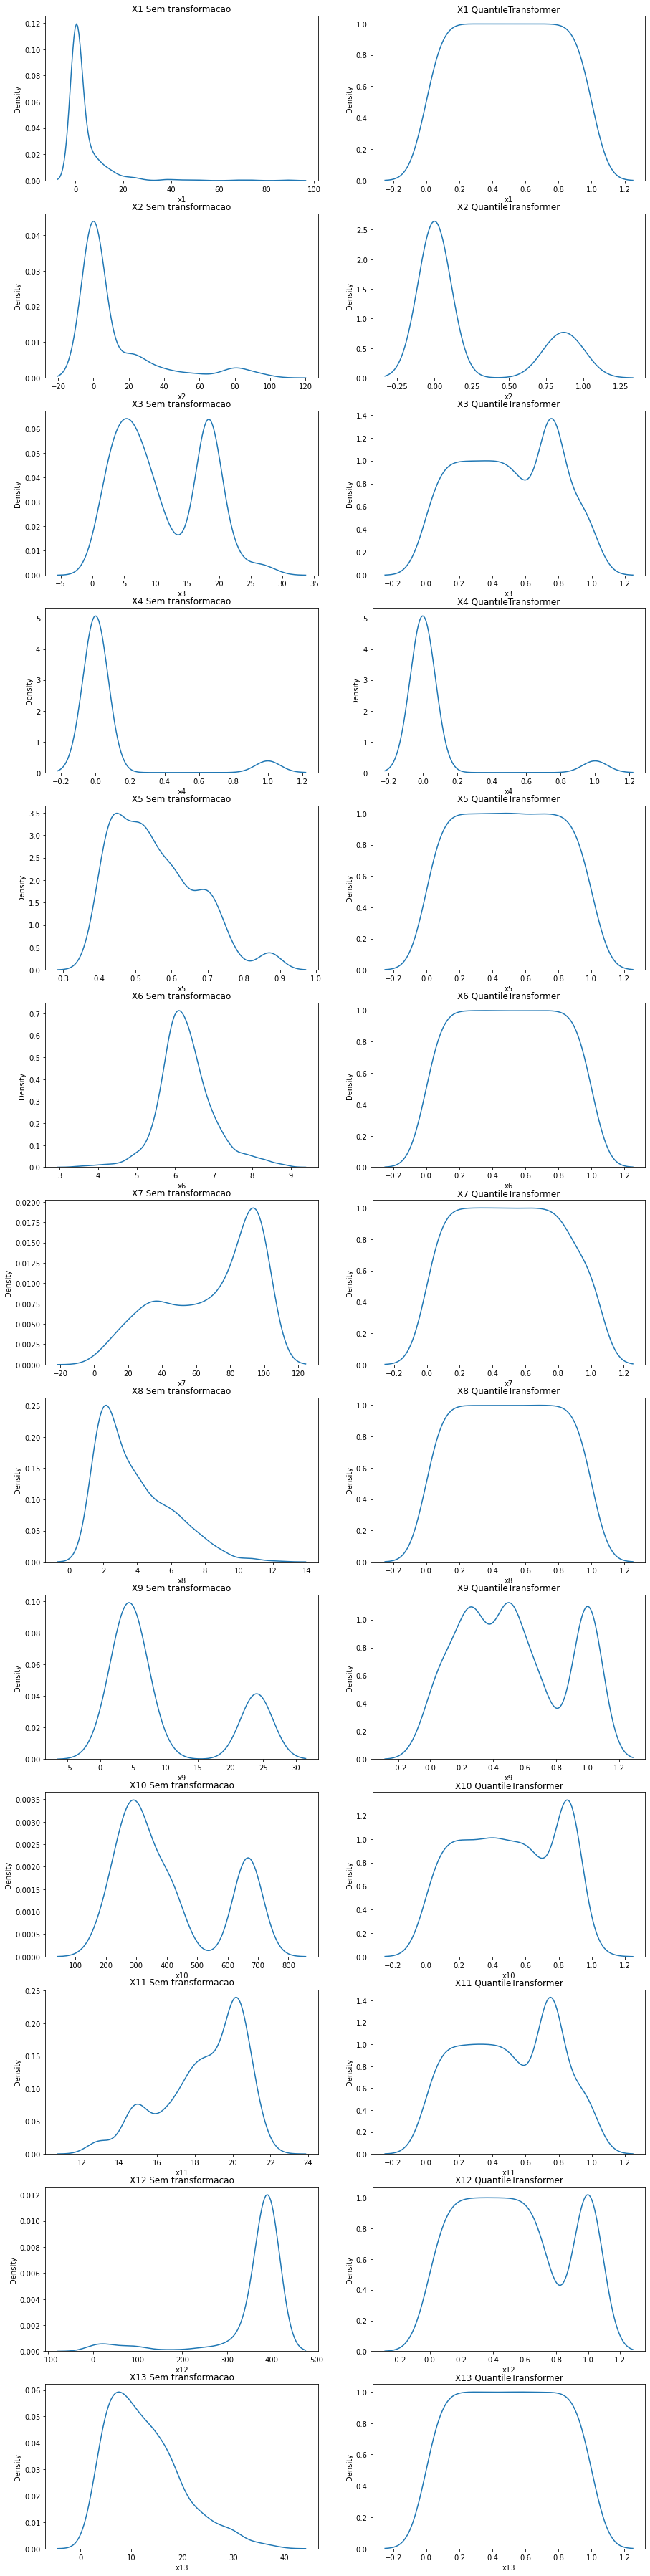

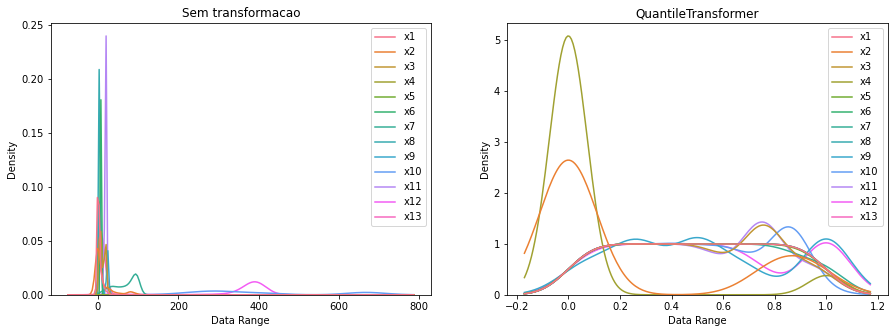

In [20]:
from sklearn.preprocessing import QuantileTransformer
QuantileTransformer = QuantileTransformer(n_quantiles=250)
data_tf = QuantileTransformer.fit_transform(Xdf)
dfQtT = pd.DataFrame(data_tf, columns=Xdf.columns)
pl_tot_dense_2(Xdf,dfQtT,"Sem transformacao","QuantileTransformer")
pt_dense(Xdf,dfQtT,"Sem transformacao","QuantileTransformer")


# Power Transformer

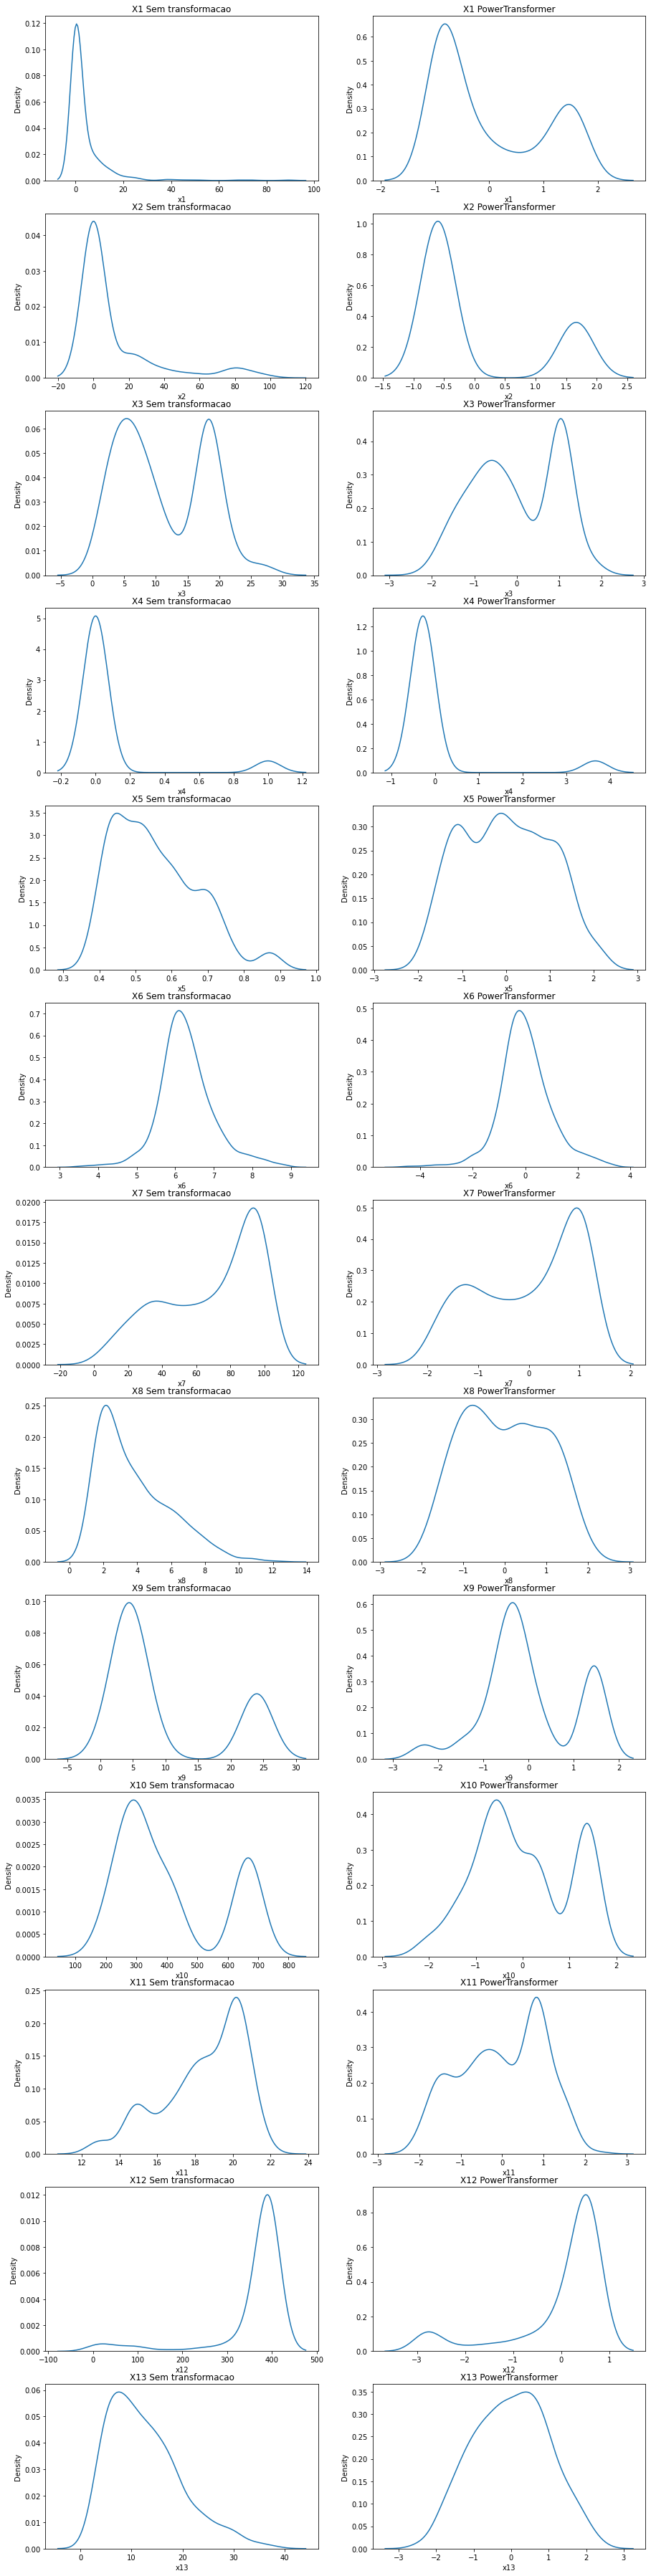

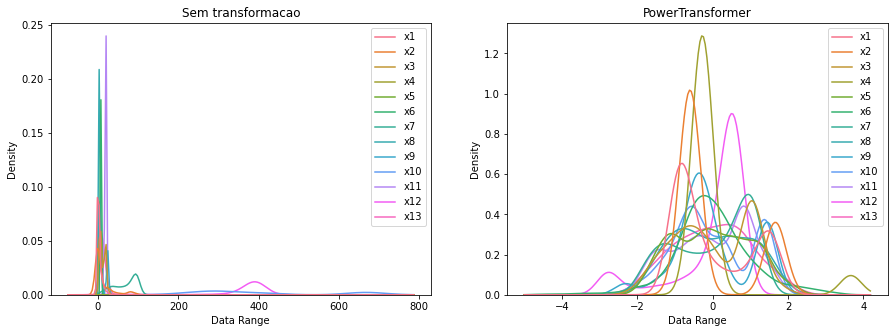

In [21]:
from sklearn.preprocessing import PowerTransformer
PowerTransformer = PowerTransformer()
data_tf = PowerTransformer.fit_transform(Xdf)
dfPT = pd.DataFrame(data_tf, columns=Xdf.columns)
pl_tot_dense_2(Xdf,dfPT,"Sem transformacao","PowerTransformer")
pt_dense(Xdf,dfPT,"Sem transformacao","PowerTransformer")

## Check Null Values

Total Null Values: 0
Total NA Values: 0


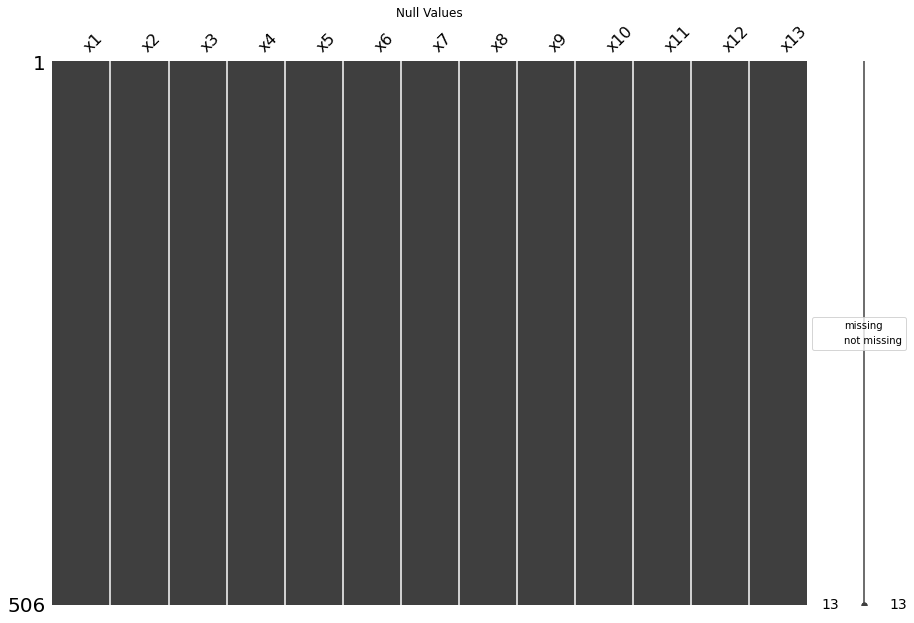

In [4]:
import missingno as msno
def CheckNullValues(Dataset):
    Null = Dataset.isnull().sum()
    Na = Dataset.isna().sum()
    print('Total Null Values:', Null.sum())
    print('Total NA Values:', Na.sum())
    msno.matrix(Dataset.sample(Dataset.shape[0]), figsize=(15,10), sparkline=True, p=0);
    plt.legend(['missing','not missing'],loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Null Values')
    plt.show()


CheckNullValues(Xdf) 

## Correlation matrix

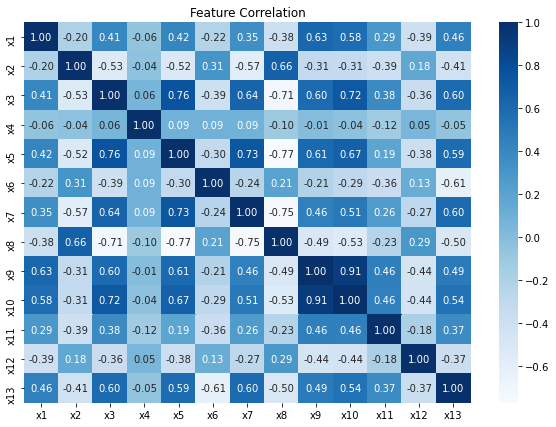

In [6]:
plt.figure(figsize=(10, 7))
sns.heatmap(Xdf.corr(), annot = True, fmt = '.2f', cmap='Blues')
plt.title('Feature Correlation')
plt.show()